# Principal Components Analysis(PCA)

Why do we even bother?
For the love of "Dimensionality reduction"! 

and number of random variables under consideration is reduced by obtaining a set of few principal variables

The method applies linear approximation to find out the components that contribute most to the variance in the dataset
 

In [27]:
# STEP 1: import necessary modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt 

# STEP 2: import data

#dataset 1: rating information  

columns_rating = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=columns_rating, usecols=range(3), encoding="ISO-8859-1")

#dataset 2: movie information
columns_movie = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(2), encoding="ISO-8859-1")

#merge dataset1 and dataset2
#ratings = pd.merge(movies, ratings)
df=pd.merge(ratings, movies, on='movie_id')

#dataset 3: movie information
columns_movie = ['movie_id', 'title','release_date','VRD','URL','unknown','Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western']
genre = ratings = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(24), encoding="ISO-8859-1")

#dataset 4: user information
# user id | age | gender | occupation | zip code

columns_users=['user_id','age','gender','occupation', 'zip_code']
users=pd.read_csv('u.user',sep='|',names=columns_users)

# add user information
merged_data=pd.merge(df, users, on='user_id')

#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')

In [28]:
#define dummy variables for occupations 
data_PCA_model = pd.get_dummies(final_data, columns=['occupation'], prefix = ['occ'])
data_PCA_model.head()

,user_id,movie_id,rating,title_x,age,gender,zip_code,title_y,release_date,VRD,...,occ_marketing,occ_none,occ_other,occ_programmer,occ_retired,occ_salesman,occ_scientist,occ_student,occ_technician,occ_writer
0,196,242,3,Kolya (1996),49,M,55105,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,0,0,1
1,63,242,3,Kolya (1996),31,M,75240,Kolya (1996),24-Jan-1997,NaN,...,1,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,M,92103,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
3,154,242,3,Kolya (1996),25,M,53703,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
4,306,242,5,Kolya (1996),45,M,73132,Kolya (1996),24-Jan-1997,NaN,...,0,0,1,0,0,0,0,0,0,0


In [29]:
# Perform Scaling on the Data --> bring them to center and scale them
# STEP 3: normalizing the data --> make them cute! (mean=0, variance=1)
# that's what "StandardScalar" do!!
from sklearn.preprocessing import StandardScaler

In [30]:
attributes = ['Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western', 'occ_administrator','occ_artist','occ_doctor','occ_educator','occ_engineer','occ_entertainment','occ_executive','occ_healthcare','occ_homemaker','occ_lawyer','occ_librarian','occ_marketing','occ_programmer','occ_retired','occ_salesman','occ_scientist','occ_student','occ_technician','occ_writer']

In [31]:
#drop observations with "NaN"
data_PCA_model.dropna(subset=['Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western', 'occ_administrator','occ_artist','occ_doctor','occ_educator','occ_engineer','occ_entertainment','occ_executive','occ_healthcare','occ_homemaker','occ_lawyer','occ_librarian','occ_marketing','occ_programmer','occ_retired','occ_salesman','occ_scientist','occ_student','occ_technician','occ_writer'])
data_PCA_model.head()

,user_id,movie_id,rating,title_x,age,gender,zip_code,title_y,release_date,VRD,...,occ_marketing,occ_none,occ_other,occ_programmer,occ_retired,occ_salesman,occ_scientist,occ_student,occ_technician,occ_writer
0,196,242,3,Kolya (1996),49,M,55105,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,0,0,1
1,63,242,3,Kolya (1996),31,M,75240,Kolya (1996),24-Jan-1997,NaN,...,1,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,M,92103,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
3,154,242,3,Kolya (1996),25,M,53703,Kolya (1996),24-Jan-1997,NaN,...,0,0,0,0,0,0,0,1,0,0
4,306,242,5,Kolya (1996),45,M,73132,Kolya (1996),24-Jan-1997,NaN,...,0,0,1,0,0,0,0,0,0,0


In [32]:
# scale the attributes and keep the columns that we need 
x = data_PCA_model.loc[:, attributes].values
y = data_PCA_model.loc[:, ['title_x']].values

# aha!! now it does the fun stuff 
x = StandardScaler().fit_transform(x)

In [33]:
# STEP 4: perform PCA for two Principal Components
pca = PCA(n_components=2)
pnc_pal_Components = pca.fit_transform(x)
pnc_palDataFrame = pd.DataFrame(data = pnc_pal_Components, columns = ['PC1', 'PC2'])

In [34]:
targetDataFrame = df[['title']]
new_DataFrame = pd.concat([pnc_palDataFrame, targetDataFrame], axis=1)

In [35]:
new_DataFrame.head()

,PC1,PC2,title
0,0.795973,-0.554077,Kolya (1996)
1,0.835384,-0.520848,Kolya (1996)
2,0.815632,-0.221819,Kolya (1996)
3,0.815632,-0.221819,Kolya (1996)
4,0.817696,-0.448941,Kolya (1996)


In [36]:
pca.explained_variance_ratio_

array([0.06028647, 0.05346303])

This result shows that the first principal component PC1 explains 6% of the variation in the original data while the second principal component explains 5% of the variation in the original data.


Text(0, 0.5, 'PC2')

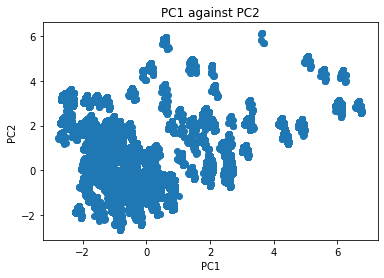

In [37]:
%matplotlib inline

plt.scatter(pnc_palDataFrame.PC1, pnc_palDataFrame.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')